# Stack Overflow Developer Survey 2017

# Asian vs North American Web Developers

### Business Understanding :

In this project I have used the dataset from [Stack Overflow survey data 2017](https://www.kaggle.com/stackoverflow/so-survey-2017/data).

The goal of this project is to find out:
* How are Job Satisfaction and Career Satisfaction are correlated ?
* Which Location has the highest Job satisfaction and Career Satisfaction ?
* At what time do Web developers want to start working at their job ?
* Who spends highest time searching for a job throught a week ?
* Who has coded long time with coding as part of their job ?

### Data Understanding

* Let's import necessary libraries.
* We asses the data and obtain the needful information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#'df' is a dataframe

df = pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 31.6+ MB


In [4]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


#### _Insights_

* Select the features that are useful
* Remove data from students, part-time etc.
* Create a column to store information based on Respondent location.
* YearsCodedJob must be mapped.
* Treat the missing value.

##### The required features are selected

In [5]:
columns = ['Respondent','Country','WebDeveloperType', 'YearsCodedJob', 'HoursPerWeek', 'JobSatisfaction' ,'CareerSatisfaction', 'Salary', 'WorkStart']
# We are making sure that people who are professional developer and employed full-time are included in the data.
data = df[df['Professional']=='Professional developer']
data = data[data['EmploymentStatus']=='Employed full-time']
data = data[data['WorkStart'].notnull()]
data = data[data['CareerSatisfaction'].notnull()]
data = data[columns]

In [6]:
data.head()

,Respondent,Country,WebDeveloperType,YearsCodedJob,HoursPerWeek,JobSatisfaction,CareerSatisfaction,Salary,WorkStart
2,3,United Kingdom,NaN,20 or more years,NaN,9.0,8.0,113750.0,9:00 AM
7,8,Poland,Full stack Web developer,7 to 8 years,1.0,7.0,7.0,NaN,Noon
8,9,Colombia,NaN,7 to 8 years,2.0,6.0,6.0,NaN,9:00 AM
13,14,Germany,Full stack Web developer,15 to 16 years,3.0,6.0,8.0,NaN,10:00 AM
14,15,United Kingdom,NaN,20 or more years,NaN,8.0,8.0,100000.0,9:00 AM


In [7]:
# Dividing into two regions
Asia = ['China', 'India','Indonesia', 'Pakistan','Bangladesh','Japan', 'Philippines', 'Vietnam','Turkey', 'Thailand',
        'South Korea', 'Malaysia','North Korea', 'Sri Lanka', 'United Arab Emirates', 'Nepal', 'Yemen','Jordan']

North_America = ['United States', 'Canada']
# Classifying and storing countries into Asia, North America and others respectively
data['Location'] = data['Country'].apply(lambda x: 'Asia' if x in Asia else ('North_America' if x in North_America else 'Other'))
data.head()

,Respondent,Country,WebDeveloperType,YearsCodedJob,HoursPerWeek,JobSatisfaction,CareerSatisfaction,Salary,WorkStart,Location
2,3,United Kingdom,NaN,20 or more years,NaN,9.0,8.0,113750.0,9:00 AM,Other
7,8,Poland,Full stack Web developer,7 to 8 years,1.0,7.0,7.0,NaN,Noon,Other
8,9,Colombia,NaN,7 to 8 years,2.0,6.0,6.0,NaN,9:00 AM,Other
13,14,Germany,Full stack Web developer,15 to 16 years,3.0,6.0,8.0,NaN,10:00 AM,Other
14,15,United Kingdom,NaN,20 or more years,NaN,8.0,8.0,100000.0,9:00 AM,Other


Now we have countries only from two regions : Asia & North America

Let's see comparison of Web Developers from each location according to their experience and see how they have reacted to every question in the survey.

### How are Job Satisfacton and Career Satisfaction are correlated ?

Let's see how Career Satisfaction and Job Satisfaction are correlated.

In [21]:
# We are creating a new dataframe with Location , CareerSatisfaction and JobSatisfaction. Also the null values from the three features are dropped.
CareerJobSat = data[['Location','CareerSatisfaction','JobSatisfaction']].dropna(axis=0, how='any')

In [22]:
# This gives a correlation coefficient. A number close to one means strong positive correlation.
CareerJobSat.JobSatisfaction.corr(df.CareerSatisfaction)

0.6194173477073712

We can observe a strong postive correlation between Career Satisfaction and Job Satisfaction

Lets's plot a joint plot to see it visually.

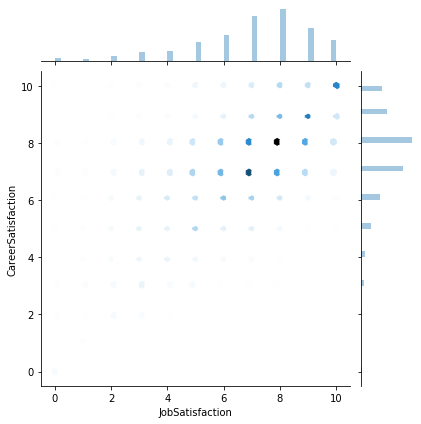

In [23]:
#We are plotting a joint plot between Job Satisfaction and Career Satisfaction. 
#The plot kind is hexagonal.
sns.jointplot(x='JobSatisfaction', y='CareerSatisfaction', data=CareerJobSat, kind='hex')

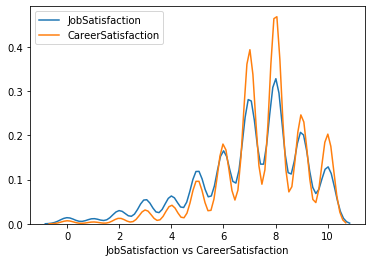

In [24]:
#A distplot plots a univariate distribution of observations.
#We are using distplot to visually show the positive correlation between Job Satisfaction and Career Satisfaction.
sns.distplot(CareerJobSat.JobSatisfaction,hist=False, label='JobSatisfaction')
sns.distplot(CareerJobSat.CareerSatisfaction,hist=False, label='CareerSatisfaction', \
             axlabel='JobSatisfaction vs CareerSatisfaction')
plt.show()


When Job Satisfaction rises Career Satisfaction also rises. Hence visually proving that they are positively correlated.

### Which Location has the highest Job satisfaction and Career Satisfaction ?

Let's find which location has higher job and career satisfaction.

Let's transform the CareerJobSat dataframe using melt.

In [25]:
#Here we are transformating the dataframe CareerJobSat with keeping the Location intact.
CareerJobSatMelt = CareerJobSat.melt(id_vars=['Location'])

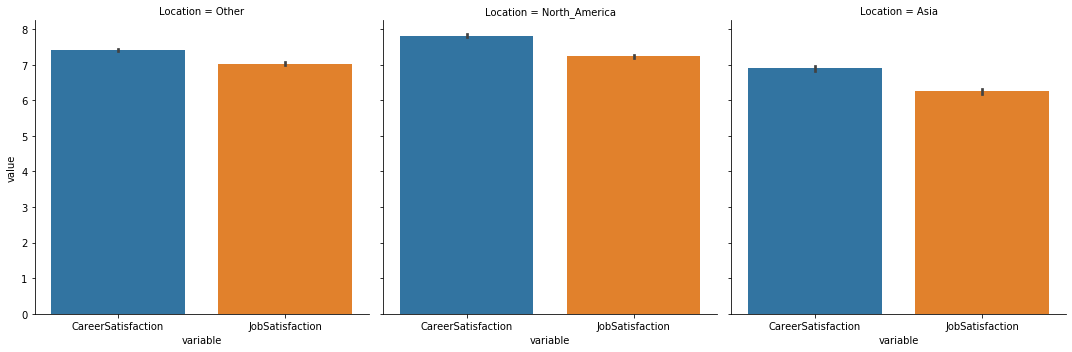

In [27]:
#Factorplot are used to plot categorical values.
#Here we are loading the tranformed DataFrame CareerJobSat to give a factorplot with kind mentioned as bar plot.
sns.factorplot(x='variable', y = 'value', data=CareerJobSatMelt, col='Location' ,kind='bar')

We can conclude that North America has the highest Job Satisfaction and Career Satisfaction.

### At what time do Web developers want to start working at their job ?

Let's find the most preffered time at which the Web Developers want to start their work.

In [28]:
# New grouped DataFrame begin is created.
begin = data[['Location','WorkStart', 'Respondent']].groupby(['Location','WorkStart']).count()

# New column Percent is created in begin_per grouped DataFrame which holds the data of percentage of WorkStart option chosen.
begin_per = begin.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
begin_per.columns = ['Percent']
# Most preffered option appears at the top.
begin_per = begin_per.reset_index().groupby('Location', group_keys=False).apply(lambda x: x.nlargest(5, 'Percent'))
begin_per.set_index(['Location', 'WorkStart'])

Percent
Location      WorkStart           
Asia          10:00 AM   28.719971
              9:00 AM    22.230190
              8:00 AM    13.122983
              11:00 AM    9.537469
              Noon        7.099319
North_America 10:00 AM   26.190807
              9:00 AM    26.149146
              8:00 AM    19.302875
              7:00 AM    12.553812
              11:00 AM    4.777114
Other         9:00 AM    26.651427
              10:00 AM   23.782122
              8:00 AM    22.654895
              7:00 AM     9.467129
              11:00 AM    6.101214

We can see that in both Asia and North America a majority of the people want to start their work at 10:00 AM.

### Who spends highest time searching for a job throught a week ?

In [29]:
Time = data[['Location', 'HoursPerWeek']].dropna(axis=0, how='any')
Time.groupby(['Location'])['HoursPerWeek'].mean()

Location
Asia             5.404487
North_America    2.254412
Other            2.473005
Name: HoursPerWeek, dtype: float64

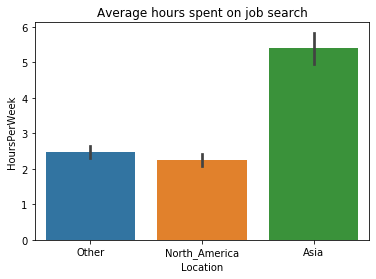

In [30]:
sns.barplot(x = 'Location', y = 'HoursPerWeek', data = Time)
plt.title('Average hours spent on job search');

Web Developers in Asia have spent more time in searching for a job throughout the week.

### Who has coded long time with coding as part of their job ?

Let's map the years of coding experience in their job to numerical values to handle the easily.

In [31]:
# We are creating a function to map the values in exp to a numerical value for ease of reading and plotting.
def NumExp(column):
    # exp is a dictionary containing the experience as key and it's numerical value as values.
    exp = {
    'Less than a year': 0,
    '1 to 2 years': 1,
    '2 to 3 years': 2,
    '3 to 4 years': 3,
    '4 to 5 years': 4,
    '6 to 7 years': 6, 
    '7 to 8 years': 7,
    '8 to 9 years': 8,
    '9 to 10 years': 9,
    '10 to 11 years': 10,
    '11 to 12 years': 11,
    '12 to 13 years': 12,
    '13 to 14 years': 13,
    '14 to 15 years': 14,
    '15 to 16 years': 15,
    '16 to 17 years': 16,
    '17 to 18 years': 17,
    '18 to 19 years': 18,
    '19 to 20 years': 19,
    '20 or more years': 20
    }
    # This maps the categorical values in YearsCodedJob to their respective keys mentioned in the above dictionary. 
    exp_code = data[['Location', column]].dropna(axis=0, how='any')
    exp_code[column] = exp_code[column].map(exp)
    
    return exp_code

In [32]:
# The function NumExp is used to map YearsCodedJob and the DataFrame is being stored in CodingExp.
CodingExp = NumExp('YearsCodedJob')
exp_plot = CodingExp.groupby(['Location'])['YearsCodedJob'].mean().reset_index()

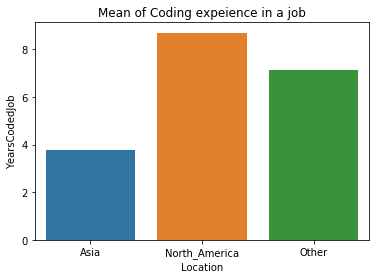

In [33]:
#The data from grouped DataFrame exp_plot is used to plot a barplot to derive the insights.
sns.barplot(x = 'Location', y = 'YearsCodedJob', data = exp_plot)
plt.title('Mean of Coding expeience in a job');

North America has the highest Web Developers who have spent most of their job in coding.

# Conclusion :

* Job Satisfaction and Career Satisfaction are positively correlated.
* North America has Web Developers with highest Job Satisfaction and Career Satisfaction.
* Web Developers wish to start their work at 10:00 AM in both Asia and North America.
* Web Developers in Asia spend more time than those in North America in searching jobs in a week.
* North America has Web Developers who had a job long time involving coding.